In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import os

In [ ]:
img_path = 'saffrun.jpg'

In [ ]:
img = cv2.imread(img_path, 0)
assert img is not None, "file could not be read, check with os.path.exists()"

## Part a

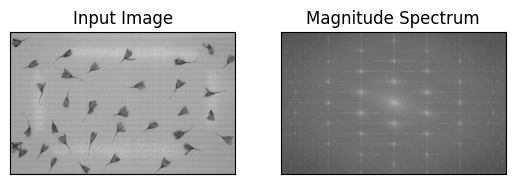

In [ ]:
# convert image to floats and do dft saving as complex output
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

# apply shift of origin from upper left corner to center of image
dft_shift = np.fft.fftshift(dft)

# extract magnitude and phase images
mag, phase = cv2.cartToPolar(dft_shift[:,:,0], dft_shift[:,:,1])

magnitude_spectrum = 20*np.log(mag)

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

Text(0.5, 1.0, 'After filtering high values')

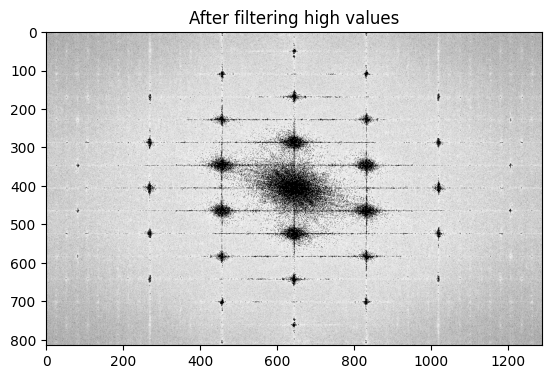

In [ ]:
mag = np.copy(magnitude_spectrum)
mag[(np.abs(mag - np.max(mag)) < 170)] = 0
plt.imshow(mag, cmap='gray')
plt.title('After filtering high values')

Text(0.5, 1.0, 'After restoring center of magnitude')

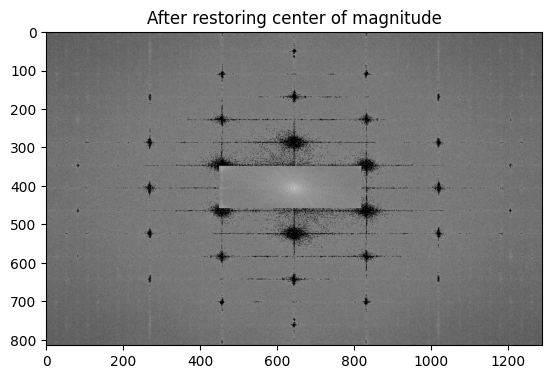

In [ ]:
mag[350:460,450:820] = magnitude_spectrum[350:460,450:820]
plt.imshow(mag, cmap='gray')
plt.title("After restoring center of magnitude")

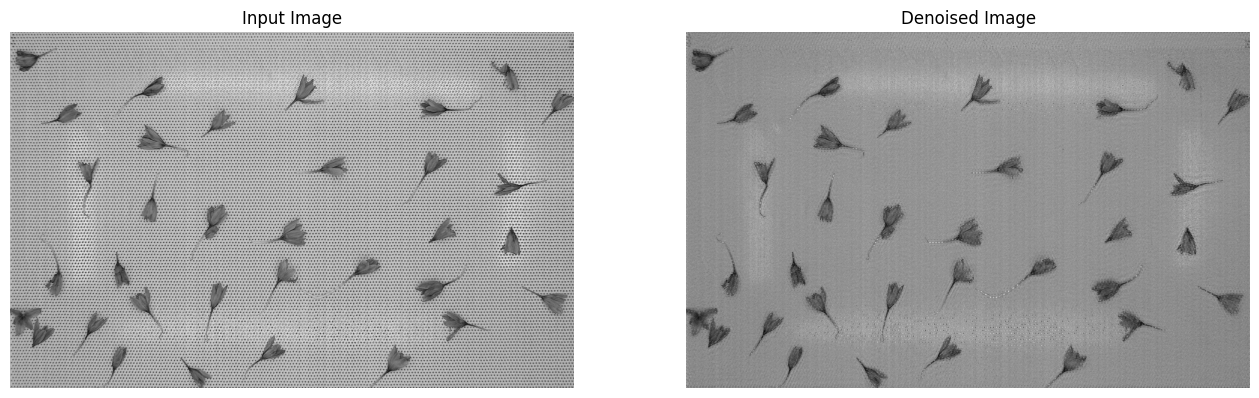

In [ ]:
original_mag = np.exp(mag/20)

# convert magnitude and phase into cartesian real and imaginary components
real, imag = cv2.polarToCart(original_mag, phase)

# combine cartesian components into one complex image
back = cv2.merge([real, imag])

# shift origin from center to upper left corner
back_ishift = np.fft.ifftshift(back)

# do idft saving as complex output
img_back = cv2.idft(back_ishift)

# combine complex components into original image again
img_part_a = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])

# Normalize back to 8bit
min, max = np.amin(img_back, (0,1)), np.amax(img_back, (0,1))
img_part_a = cv2.normalize(img_part_a, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

plt.figure(figsize=(16,8))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.axis('off')
plt.subplot(122),plt.imshow(img_part_a, cmap = 'gray')
plt.title('Denoised Image'), plt.axis('off')
plt.show()

## Part B

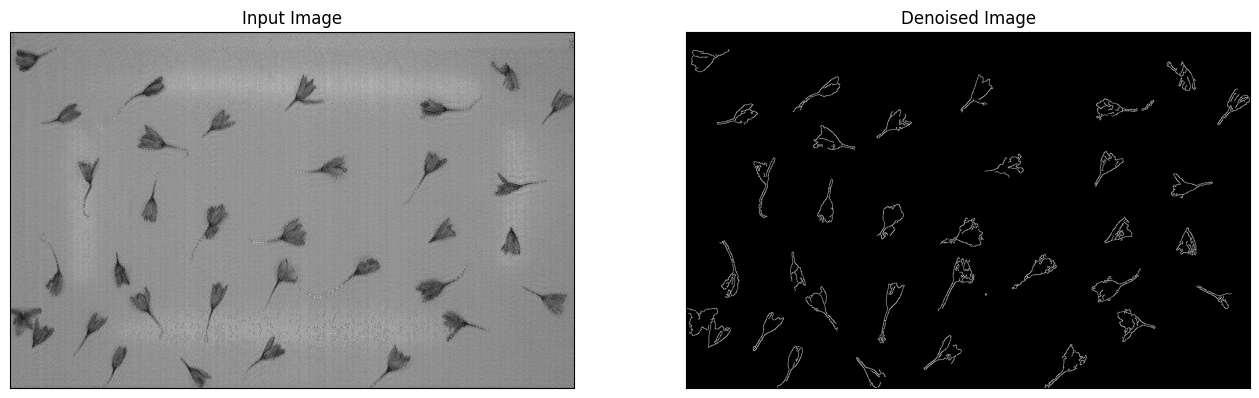

In [ ]:
blur = cv2.GaussianBlur(img_part_a, (7, 7), 0) # Smooth image using guassian kernels
img_part_b = cv2.Canny(blur, 20, 120)

plt.figure(figsize=(16,8))
plt.subplot(121),plt.imshow(img_part_a, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_part_b, cmap = 'gray')
plt.title('Denoised Image'), plt.xticks([]), plt.yticks([])
plt.show()

## Part C

In [ ]:
sobelx = cv2.Sobel(img_part_b, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in X direction
sobely = cv2.Sobel(img_part_b, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in Y direction

In [ ]:
magnitude = np.sqrt(sobelx**2 + sobely**2)
direction = np.arctan2(sobely, sobelx)  # Direction of gradients

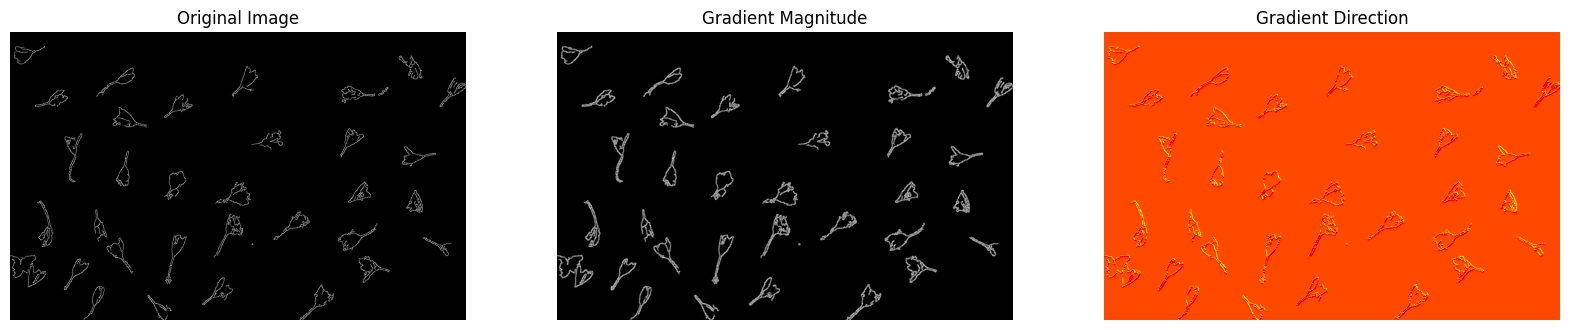

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(131)
plt.title('Original Image')
plt.imshow(img_part_b, cmap='gray')
plt.axis('off')

plt.subplot(132)
plt.title('Gradient Magnitude')
plt.imshow(magnitude, cmap='gray')
plt.axis('off')

plt.subplot(133)
plt.title('Gradient Direction')
plt.imshow(np.degrees(direction), cmap='hot')  # Converting radians to degrees for visualization
plt.axis('off')

plt.show()